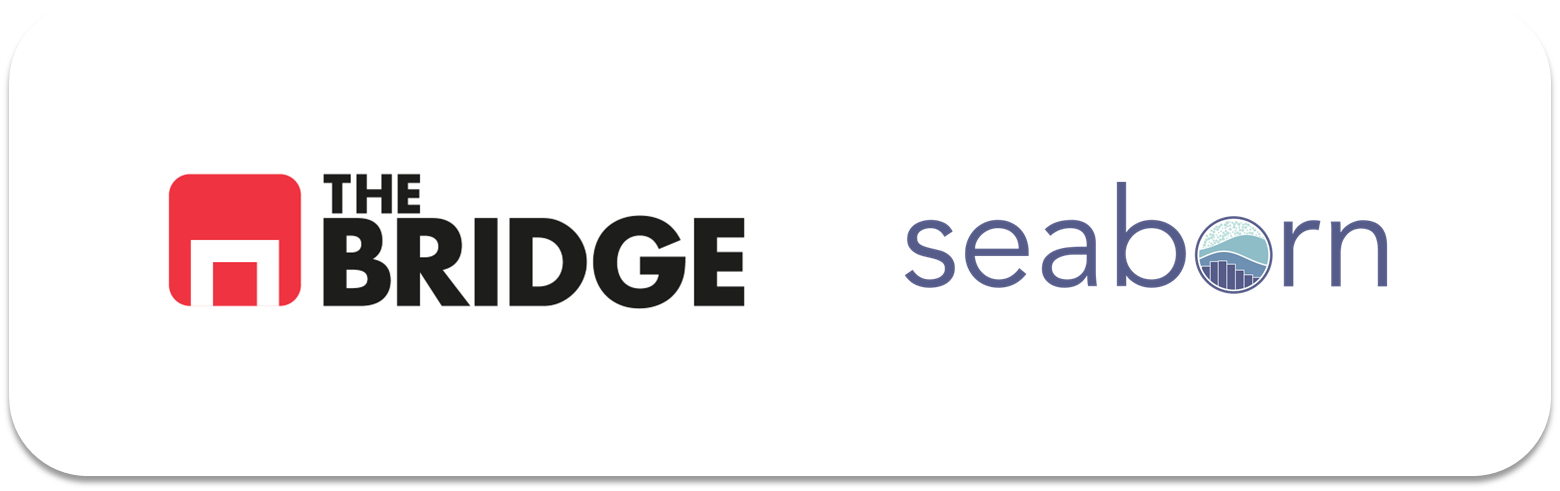

# Visualización Aplicada: Mostrando una Variable Numérica

Hagamos las importaciones necesarias y veamos que gráficas y visualizaciones tenemos para hablar de una variable numérica. Cargamos datos y los limpiamos un poco, hoy tenemos nuevos amiguitos...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")

In [2]:
#AC
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"])
df_bitcoin.set_index("fechas", inplace = True)
df_bitcoin.drop("date", axis = 1, inplace = True)
df_bitcoin.head()


,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Gráficas y consideraciones

Vamos a ver:
- Histrogramas, Funciones de densidad, Combinado de ambas
- Diagramas de "cajas": Boxplot, Diagramas de enjambre, Diagramas de violín
- Diagramas de evolución/series temporales: Lineas y áreas (gráficos de evolución/se)

* **Cuándo**: 
    1. Para análisis univariante de dispersión y de outliers. 
    2. Para presentación: Solo para mostrar la forma de la distribución (por ejemplo como justificación de usar una medida de tendencia central, de asumir propiedades de distribuciones con esa forma, etc), buscar la manera de que no sea excesivamente "informativa" (no poner ejes o ponerlos solo con valores minimo y máximo), si hay que resaltar un número poner ese numero bien claro marcándolo. En general no usar boxplots ni similares salvo que la situación lo requiera (contextos científicos, donde se sepa que es un IQR, etc). 
    3. Para series (temporales o secuencias) y diagramas de evolución en Presentaciones: Mostrar la forma y usarlo como complemento estético, contextual o de refuerzo del verdadero mensaje (normalmente periodos de caída, de subida, momentos o puntos de inflexión) y remarcar el mensaje de alguna forma (rodear la zona, anotarla con matplotlib, sobredestacarla...)  

* **Cuándo no**: En presentaciones: Si te los puedes ahorrar mejor :-), salvo que el mensaje sea la propia distribución, evolución, claro.

In [ ]:
# MARCA SOLO LAS PARTES QUE REFUERCEN TU MENSAJE

### Distribución: Histrogramas, Funciones Densidad (KDE), Combinado


Empezamos con el histograma, ese viejo compañero ya (tanto que no te hago escribir)

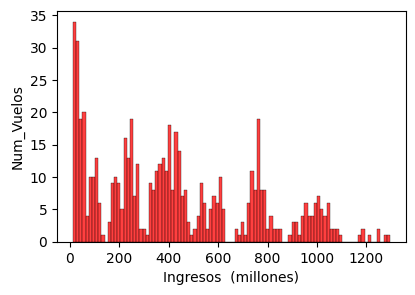

In [3]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_viajes["ingresos"]/1000, #no pongo el data, sino directamente los valores
             kde=False, # que no pinte las dos: histograma y la densidad de probabilidad
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Ingresos  (millones)")
axs.set_ylabel("Num_Vuelos");

Veamos ahora el Kernel Density Estimation (KDE) o nuestra estimación de la función de densidad:

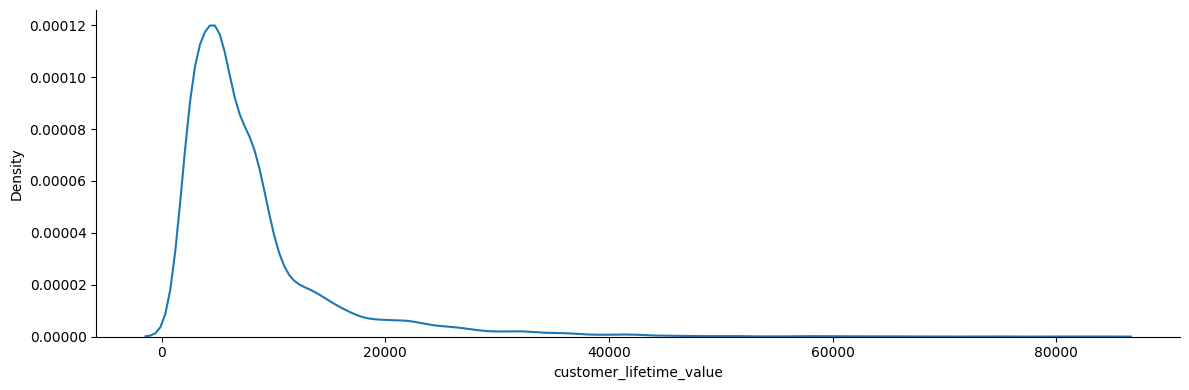

In [ ]:
#AC
fg = sns.displot(x="customer_lifetime_value", data = df_seguros,
                 kind= "kde", height=4, aspect=3)
# kind= kde → Kernel Density Estimation
# height controla la altura del gráfico
# aspect la relación ente ancho/alto (x3 veces el ancho sobre el alto)
# Ojo este gráfico se puede asignar a un "axes" pero en realidad 
# es para mostrar uno por "figure" (es sólo por completitud)

Y ahora los dos juntos:

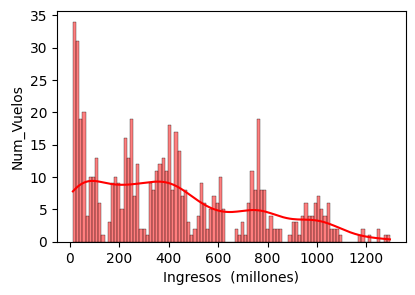

In [ ]:
# Es lo que solemos hacer, ponerlos juntos
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_viajes["ingresos"]/1000,
             kde=True, #solo con esto :)
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Ingresos  (millones)")
axs.set_ylabel("Num_Vuelos");

### Distribución (II): Caja, Enjambre, Violín

#### Caja

Nuestro querido y conocido diagrama de caja:




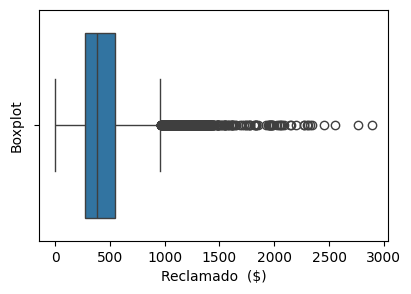

In [6]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.boxplot(x = "total_claim_amount", data = df_seguros);
axs.set_xlabel("Reclamado  ($)")
axs.set_ylabel("Boxplot");

### Enjambre 

Este es nuevo y es interesante para análisis, no sé hasta que punto lo es para visualización salvo que en él se vea algo que no se pueda mostrar de otra forma. Este diagrama nos muestra los puntos 

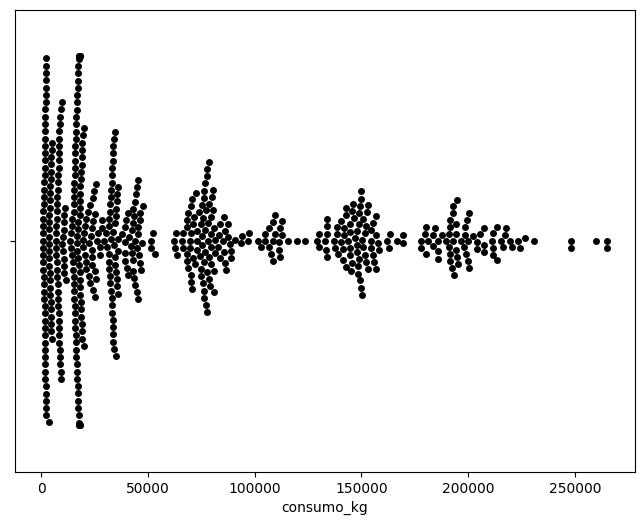

In [7]:
#AC
# Una variable continua la va a considerar, como si en vez de ser valores tal cual,
# como si fuera una variable ordinal: como si hubiera tantas categorías como valores
# diferentes puede adquirir la función.
# Pinta esos puntos intentando que no se superpongan
plt.figure(figsize=(8,6))
sns.swarmplot(x = "consumo_kg", data=df_viajes, 
              color="black");

Nos muestra para los valores de consumo los puntos sin solape en cada valor. Se suele complementar con un gráfico de caja o de violín para ver la dispersión y la distribución:

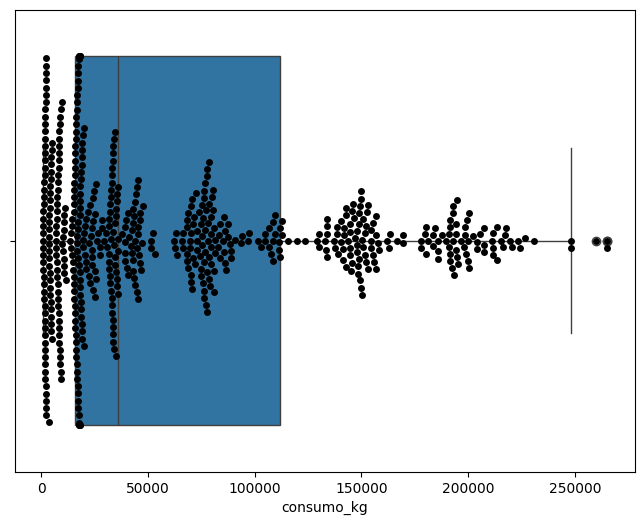

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "consumo_kg", data = df_viajes)
sns.swarmplot(x = "consumo_kg", data=df_viajes,
             color="black");

Y para terminar esta parte, los violines (musica maestro):

<Axes: xlabel='consumo_kg'>

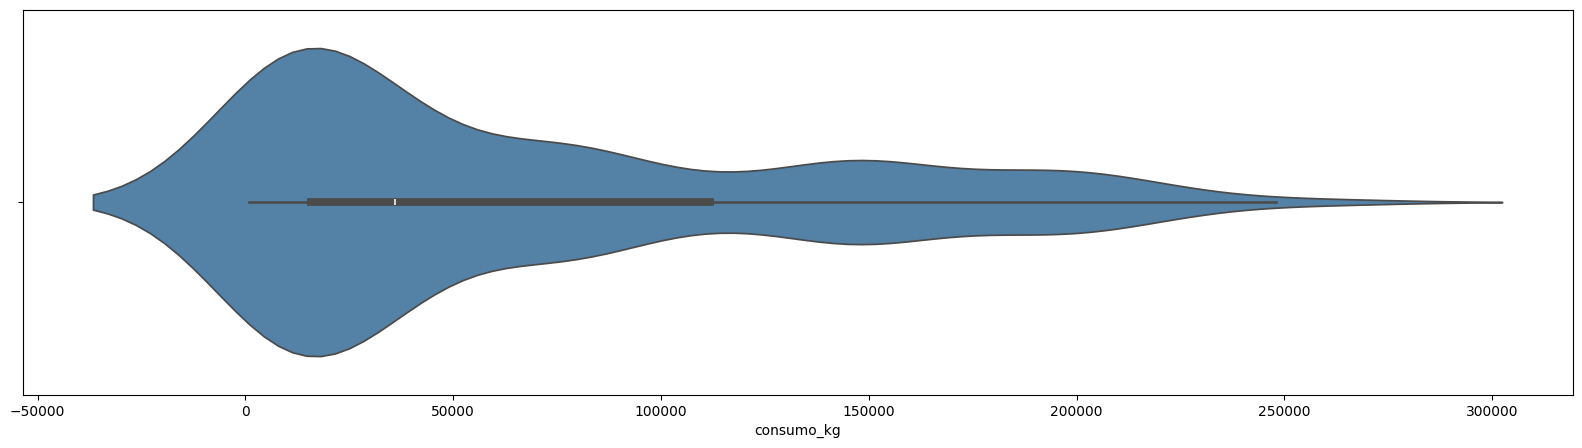

In [9]:
#AC
plt.figure(figsize=(20,5))
sns.violinplot(df_viajes["consumo_kg"], color='steelblue', orient="h")


### Evolución: Línea y Área

Para acabar la sesión veamos como pintar una variable cuando esta representa una secuencia de valores ordenados, como una serie temporal. El ejemplo que usamos son las cotizaciones diarias de bitcoin hasta 2022:

<Axes: xlabel='fechas', ylabel='close'>

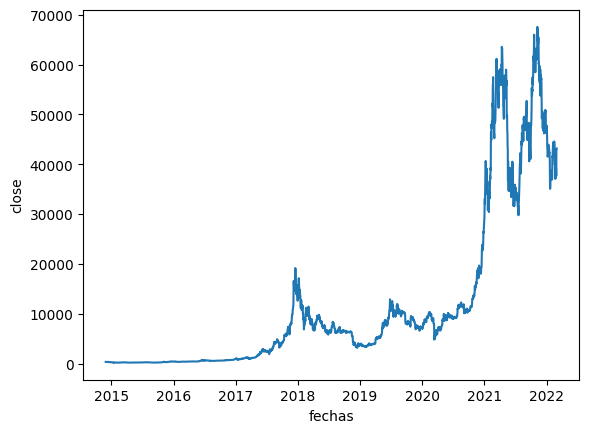

In [11]:
# AC
# Tan sencillo como pintar un gráfico de línea, escogiendo bien el eje-x, por eso cambiamos a la fecha:
sns.lineplot(x = df_bitcoin.index, y="close", data = df_bitcoin)

En una visualización deberíamos marcar en el gráfico anterior la parte más destacada, no vale mostrarlo así... Por ejemplo haciendo uso de text y annotations, como vimos en la última sesión de la unidad anterior